In [ ]:
import matplotlib.pyplot as plt
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

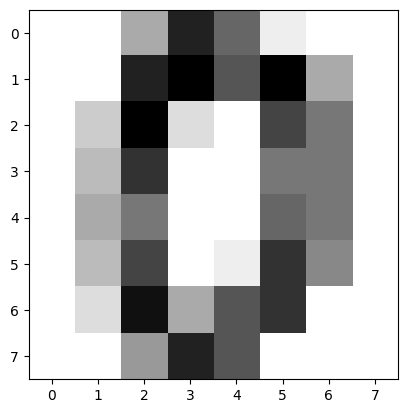

In [ ]:
digits = datasets.load_digits()
plt.imshow(digits.images[0], cmap=plt.cm.gray_r, interpolation='nearest')

In [ ]:
n_samples = len(digits.images)

data = digits.images.reshape((n_samples, -1))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
data, digits.target, test_size=0.2)

In [ ]:
# 의사결정나무 분류기
dt = DecisionTreeClassifier(random_state=42)
# 랜덤 포레스트 분류기 (200개의 트리 사용)
rf = RandomForestClassifier(n_estimators=200, random_state=42)
# 로지스틱 회귀 (다중 클래스 분류)
lr = LogisticRegression(max_iter=1000, random_state=42)
knn = KNeighborsClassifier(n_neighbors=6)

In [ ]:
# fit 함수를 통해 학습
print("모델 학습을 시작합니다...")
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)
lr.fit(X_train, y_train)
knn.fit(X_train, y_train)
print("모델 학습이 완료되었습니다.")

모델 학습을 시작합니다...
모델 학습이 완료되었습니다.


In [ ]:
# 테스트 데이터로 예측해본다.
dt_y_pred = dt.predict(X_test)
rf_y_pred = rf.predict(X_test)
lr_y_pred = lr.predict(X_test)
knn_pred = knn.predict(X_test)

# 정확도를 계산한다.
dt_scores = metrics.accuracy_score(y_test, dt_y_pred)
rf_scores = metrics.accuracy_score(y_test, rf_y_pred)
lr_scores = metrics.accuracy_score(y_test, lr_y_pred)
knn_scores = metrics.accuracy_score(y_test, knn_pred)

print("의사결정나무 정확도: ", dt_scores)
print("랜덤 포레스트 정확도: ", rf_scores)
print("로지스틱 회귀 정확도: ", lr_scores)
print("KNN 정확도: ", knn_scores)

의사결정나무 정확도:  0.8472222222222222
랜덤 포레스트 정확도:  0.9555555555555556
로지스틱 회귀 정확도:  0.9583333333333334
KNN 정확도:  0.9777777777777777


의사결정나무 예측값:  [9]
랜덤 포레스트 예측값:  [9]
로지스틱 회귀 예측값:  [9]
KNN 예측값:  [9]


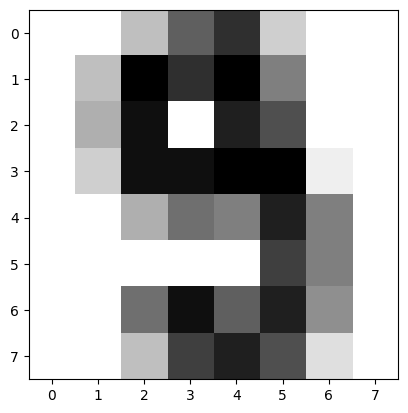

In [ ]:
# 이미지를 출력하기 위하여 평탄화된 이미지를 다시 8×8 형상으로 만든다.
plt.imshow(X_test[10].reshape(8,8), cmap=plt.cm.gray_r, interpolation='nearest')

# 입력은 항상 2차원 행렬이어야 한다.
dt_pred = dt.predict([X_test[10]])
rf_pred = rf.predict([X_test[10]])
lr_pred = lr.predict([X_test[10]])
knn_pred = knn.predict([X_test[10]])

print("의사결정나무 예측값: ", dt_pred)
print("랜덤 포레스트 예측값: ", rf_pred)
print("로지스틱 회귀 예측값: ", lr_pred)
print("KNN 예측값: ", knn_pred)

In [ ]:
import pandas as pd
import numpy as np
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

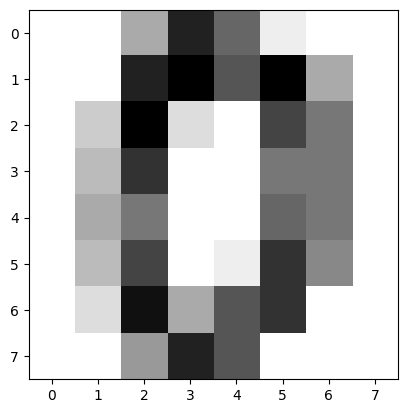

In [ ]:
digits = datasets.load_digits()
plt.imshow(digits.images[0], cmap=plt.cm.gray_r, interpolation='nearest')

X = digits.data  # 이미지 데이터 (8x8 이미지를 64개의 특성으로 펼친 형태)
y = digits.target # 각 이미지에 해당하는 숫자 (0~9)

In [ ]:
# 데이터 정규화 (Standardization)
# 픽셀 값을 0~16 사이에서 평균 0, 표준편차 1인 값으로 변환
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# 레이블을 원-핫 인코딩(One-Hot Encoding)으로 변환
# 예: 3 -> [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
y_categorical = to_categorical(y, num_classes=10)

In [ ]:
# 학습 데이터와 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_categorical, test_size=0.2, random_state=42, stratify=y_categorical
)

print(f"훈련 데이터 형태: {X_train.shape}")
print(f"테스트 데이터 형태: {X_test.shape}")

훈련 데이터 형태: (1437, 64)
테스트 데이터 형태: (360, 64)


In [ ]:
model = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(64,)),
    layers.Dropout(0.2),
    layers.Dense(64, activation="relu"),
    # 출력층: 10개의 클래스(0~9)에 대한 확률을 출력
    layers.Dense(10, activation="softmax")
])

# 모델 구조 요약 출력
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_21 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,226 (67.29 KB)

 Trainable params: 17,226 (67.29 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",   # one-hot이면 categorical_crossentropy
    metrics=["accuracy"]
)

In [ ]:
# 모델 학습
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=16,
    verbose=1
)

Epoch 1/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.3824 - loss: 1.9019 - val_accuracy: 0.9340 - val_loss: 0.5336
Epoch 2/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8858 - loss: 0.5044 - val_accuracy: 0.9653 - val_loss: 0.1790
Epoch 3/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9435 - loss: 0.2052 - val_accuracy: 0.9792 - val_loss: 0.1043
Epoch 4/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9714 - loss: 0.1278 - val_accuracy: 0.9861 - val_loss: 0.0739
Epoch 5/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9731 - loss: 0.1120 - val_accuracy: 0.9896 - val_loss: 0.0657
Epoch 6/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9892 - loss: 0.0810 - val_accuracy: 0.9861 - val_loss: 0.0547
Epoch 7/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9868 - loss: 0.0560 - val_accuracy: 0.9861 - val_loss: 0.0549
Epoch 8/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9922 - loss: 0.0447 - val_accuracy: 0.9896 - val_loss:

In [ ]:
y_pred = model.predict(X_test)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


In [ ]:
y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)

In [ ]:
# 학습 곡선
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

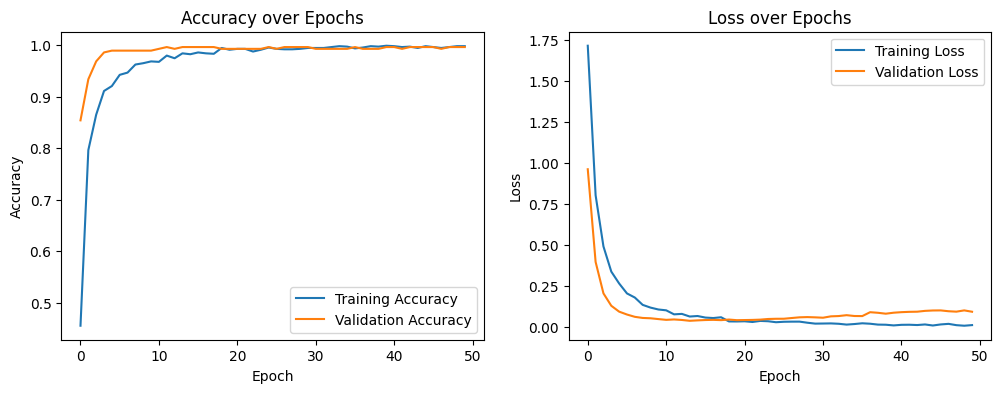

In [ ]:
# 학습 과정 시각화 (정확도 및 손실)
plt.figure(figsize=(12, 4))

# 정확도 그래프
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# 손실 그래프
plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

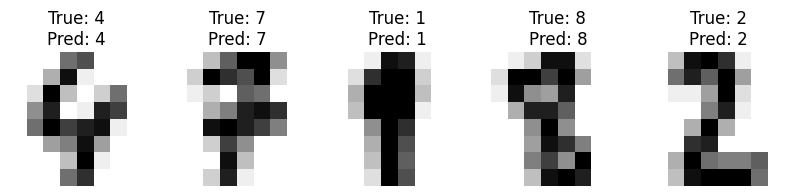

In [ ]:
# 예측 결과 중 일부를 이미지와 함께 출력
n_images = 5
plt.figure(figsize=(10, 4))
for i in range(n_images):
    ax = plt.subplot(1, n_images, i + 1)
    # 원래 이미지 형태로 복원 (64 -> 8x8)
    image = X_test[i].reshape(8, 8)
    # 스케일링 되돌리기 (시각화를 위해)
    image = scaler.inverse_transform(X_test[i].reshape(1, -1)).reshape(8, 8)

    plt.imshow(image, cmap=plt.cm.binary)
    plt.title(f"True: {true_classes[i]}\nPred: {predicted_classes[i]}")
    plt.axis('off')
plt.show()

In [ ]:
#예측 값에 대한 정확도 확인
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.97      0.95      0.96        37
           2       0.94      0.97      0.96        35
           3       0.97      0.95      0.96        37
           4       1.00      0.97      0.99        36
           5       1.00      0.94      0.97        36
           6       1.00      1.00      1.00        36
           7       0.97      1.00      0.99        36
           8       0.88      1.00      0.93        35
           9       0.97      0.92      0.94        36

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360

[[36  0  0  0  0  0  0  0  0  0]
 [ 0 35  0  0  0  0  0  0  2  0]
 [ 0  1 34  0  0  0  0  0  0  0]
 [ 0  0  2 35  0  0  0  0  0  0]
 [ 0  0  0  0 35  0  0  1  0  0]
 [ 0  0  0  0  0 34  0  0  1  1]
 [ 0  0  0  0  0  0 36  0  0  0]
 [ 0  0  0

In [1]:
import pandas as pd
import numpy as np
from tensorflow.keras import layers, models
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, classification_report,confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# -----------------------------
# 1) 데이터 준비
# -----------------------------

df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/machine-learning-practice/Machine-Learning-Programming/week5/data/diabetes.csv")

# 결측치 확인
print("결측치 확인:\n", df.isnull().sum())

# 결측치가 있는 행이 있다면 제거
df = df.dropna()

df

결측치 확인:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


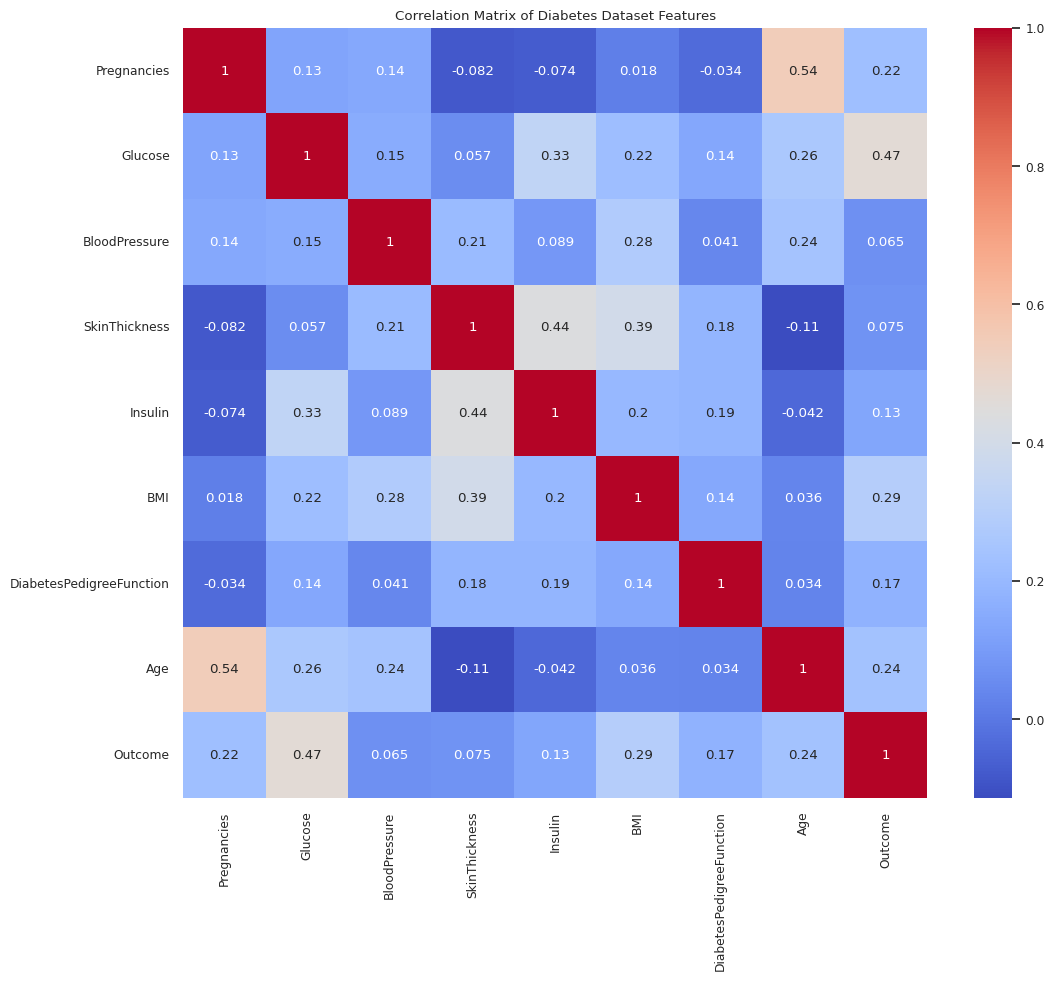

In [ ]:
#상관 관계 행렬
# 0.3 이상인 경우 상관관계가 있고, 0.7이상이면 아주 높음

df_corr = df.corr()

#히트맵
plt.figure(figsize=(12, 10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=True, cmap='coolwarm')
plt.title("당뇨병 데이터셋 특징의 상관 행렬")
plt.show()

# BMI와 상관관계가 높은 것은 SkinThickness

In [ ]:
# 'BMI' 열을 제외한 모든 열을 X로 사용
X = df.drop(columns=["BMI"])
# 'BMI' 열을 y로 사용
y = df["BMI"]

In [ ]:
#데이터 정규화
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
# one-hot encoding
Y = pd.get_dummies(y).values
# X = X.values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)

print("데이터 형태 확인:")
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

데이터 형태 확인:
(614, 8) (154, 8) (614, 248) (154, 248)


In [ ]:
model = models.Sequential([
    # 입력층
    layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2), # 과적합 방지
    layers.Dense(32, activation='relu'),
    # 출력층: 회귀 출력(BMI)을 위한 단일 뉴런
    layers.Dense(1)
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mse']
)

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,521 (45.00 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=16,
    verbose=1
)

Epoch 1/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0204 - mse: 0.0204 - val_loss: 0.0061 - val_mse: 0.0061
Epoch 2/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0073 - mse: 0.0073 - val_loss: 0.0051 - val_mse: 0.0051
Epoch 3/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0059 - mse: 0.0059 - val_loss: 0.0048 - val_mse: 0.0048
Epoch 4/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0048 - mse: 0.0048 - val_loss: 0.0045 - val_mse: 0.0045
Epoch 5/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0047 - mse: 0.0047 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 6/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0047 - mse: 0.0047 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 7/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 8/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 9/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0044 - mse:

In [ ]:
y_pred = model.predict(X_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


In [ ]:
y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)

In [ ]:
# 학습 곡선
mse = history.history['mse']
val_mse = history.history['val_mse']

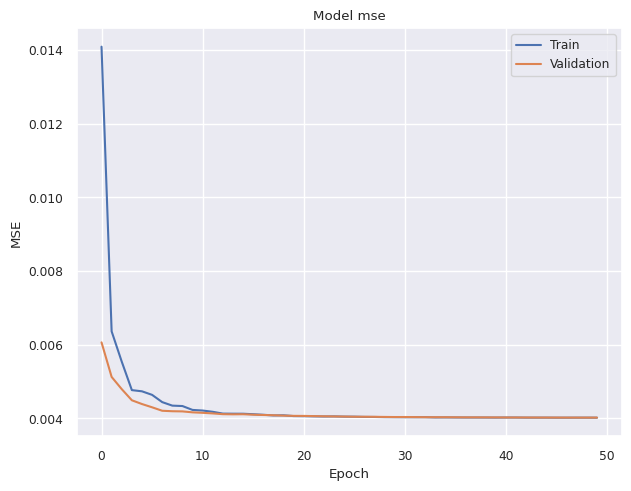

In [ ]:
# 학습 과정 시각화 (정확도 및 손실)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(mse)
plt.plot(val_mse)
plt.title('Model mse')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.tight_layout()
plt.show()


In [ ]:
model.evaluate(X_test, y_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0040 - mse: 0.0040 


[0.0040255580097436905, 0.0040255580097436905]

In [ ]:
#예측 값에 대한 정확도 확인
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.03      1.00      0.05         4
           2       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         1
          19       0.00      0.00      0.00         1
          26       0.00      0.00      0.00         1
          27       0.00      0.00      0.00         1
          30       0.00      0.00      0.00         2
          32       0.00      0.00      0.00         1
          33       0.00      0.00      0.00         1
          39       0.00      0.00      0.00         1
          40       0.00      0.00      0.00         2
          43       0.00      0.00      0.00         1
          44       0.00      0.00      0.00         2
          47       0.00    

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
